In [2]:
import numpy
import matplotlib.pyplot

# Law of Large Numbers

The law of large numbers is a statistical principle that states that as the sample size of a population becomes larger, the mean of the sample will tend to become closer to the true mean of the population. This is often expressed mathematically as:

$$\lim_{n\to\infty} P\left(\left|\frac{1}{n}\sum_{i=1}^{n}X_i - \mu\right| < \epsilon\right) = 1$$

In this equation, $X_1, X_2, ..., X_n$ are independent and identically distributed random variables with a mean of $\mu$ and a finite variance. The symbol $\lim_{n\to\infty}$ represents the limit as the sample size $n$ approaches infinity. The term $P(\left|\frac{1}{n}\sum_{i=1}^{n}X_i - \mu\right| < \epsilon)$ is the probability that the difference between the sample mean and the true mean is less than a small positive value $\epsilon$. The law of large numbers states that this probability approaches 1 as the sample size becomes larger.

Intuitively, the law of large numbers states that as the sample size increases, the sample mean will become a better estimate of the true population mean. This is because the sample mean is the average of a larger number of observations, so it is less affected by individual deviations from the mean.

## Generate a Population of Random Numbers

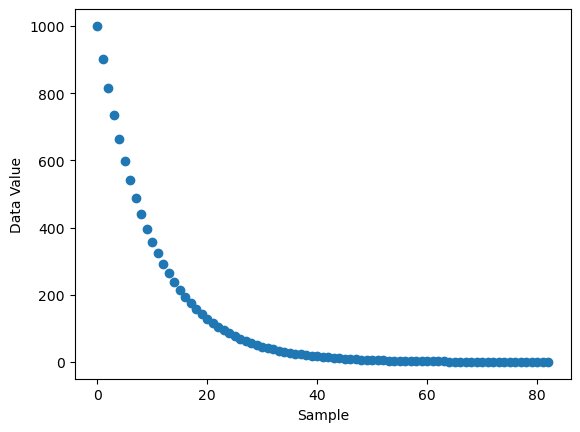

In [71]:
# Simulation Parameters
populationSize = 8.3e5
sampleSize = 50
numfSample = 500
numfMetaSamples = 100

# 1/f
f = 1/numpy.logspace(numpy.log10(.001),numpy.log10(5),int(populationSize))
trueMean = numpy.mean(f)
skip = int(1e4)
matplotlib.pyplot.plot(f[::skip],'o')
matplotlib.pyplot.xlabel('Sample')
matplotlib.pyplot.ylabel('Data Value');

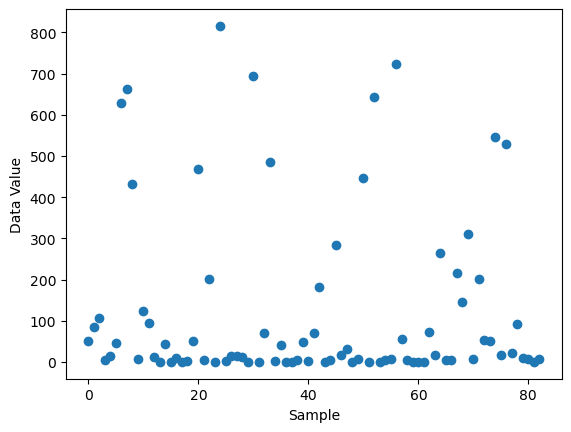

In [36]:
# Shuffle the data
numpy.random.shuffle(f)
skip = int(1e4)
matplotlib.pyplot.plot(f[::skip],'o')
matplotlib.pyplot.xlabel('Sample')
matplotlib.pyplot.ylabel('Data Value');

## Monte Carlo Sampling

Monte Carlo sampling is a statistical method for estimating a population parameter by generating a large number of random samples from the population and calculating the mean of those samples. This process is called Monte Carlo simulation, and it is named after the city of Monte Carlo in Monaco, which is famous for its casinos and probability-based games.

Monte Carlo sampling can be expressed mathematically as follows:

$$\hat{\mu} = \frac{1}{N}\sum_{i=1}^{N} x_i$$

In this equation, $\hat{\mu}$ is the estimated population mean, $N$ is the number of samples drawn, and $x_1, x_2, ..., x_N$ are the individual samples drawn from the population. The mean of these samples is calculated and taken as an estimate of the true population mean.

To use Monte Carlo sampling, we first define the population from which we want to draw samples and the parameter we want to estimate. We then generate a large number of random samples from the population and calculate the mean of those samples. The more samples we draw, the more accurate our estimate will be.

In [42]:
sampleMeans = numpy.zeros(numfSample)
for i in range(numfSample):
    sampleMeans[i] = (numpy.mean(numpy.random.choice(f,size=sampleSize)))

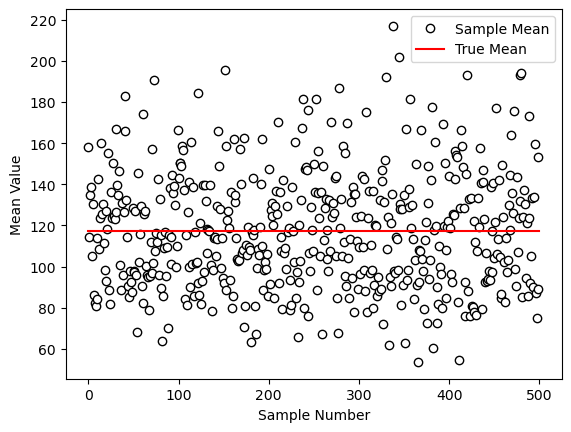

In [56]:
matplotlib.pyplot.plot(sampleMeans,'o',c='black',markerfacecolor='w',label="Sample Mean")
matplotlib.pyplot.plot([0,numfSample],[trueMean,trueMean],c='red',linewidth=1.5,label='True Mean')
matplotlib.pyplot.xlabel('Sample Number')
matplotlib.pyplot.ylabel('Mean Value')
matplotlib.pyplot.legend();

## Cumulative Averaging
To calculate a cumulative average, we start by selecting the time period for which we want to calculate the average. This can be a fixed number of data points, or it can be a fixed time interval. We then calculate the average of the data points within this time period and update the average as new data points are added.

In [63]:
cumave = numpy.zeros(numfSample)

for i in range(numfSample):
    cumave[i] = numpy.mean(sampleMeans[:i+1])
    
cumv2 = numpy.cumsum(sampleMeans) / numpy.arange(1,numfSample+1)

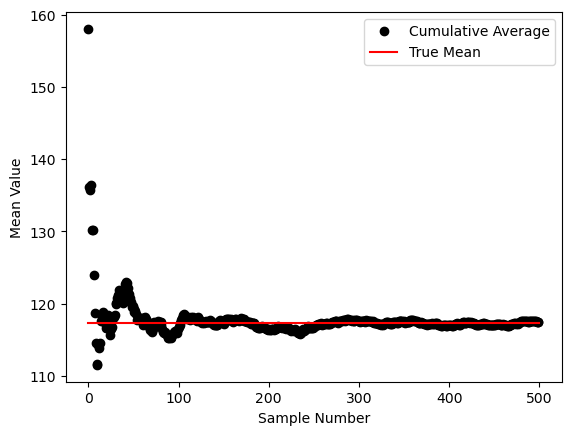

In [69]:
matplotlib.pyplot.plot(cumave,'ko',label='Cumulative Average')
matplotlib.pyplot.plot([0,numfSample],[trueMean,trueMean],c='red',linewidth=1.5,label='True Mean')
matplotlib.pyplot.legend()
matplotlib.pyplot.xlabel('Sample Number')
matplotlib.pyplot.ylabel('Mean Value');

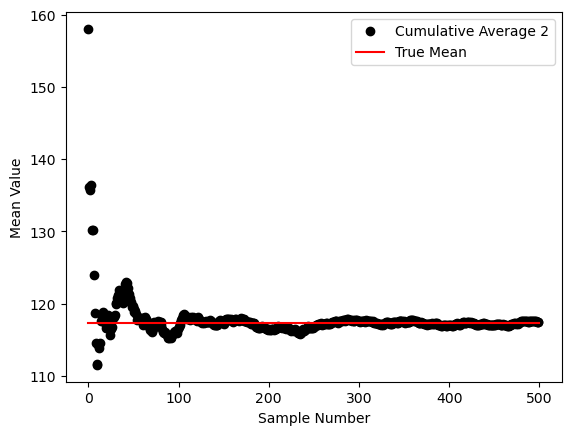

In [70]:
matplotlib.pyplot.plot(cumv2,'ko',label='Cumulative Average 2')
matplotlib.pyplot.plot([0,numfSample],[trueMean,trueMean],c='red',linewidth=1.5,label='True Mean')
matplotlib.pyplot.legend()
matplotlib.pyplot.xlabel('Sample Number')
matplotlib.pyplot.ylabel('Mean Value');

In [74]:
cumvs = numpy.zeros((numfMetaSamples,numfSample))
for j in range(numfMetaSamples):
    for i in range(numfSample):
        randxample = numpy.random.choice(f,size=sampleSize)
        sampleMeans[i]= numpy.mean(randxample)
    tmp = numpy.cumsum(sampleMeans)/numpy.arange(1,numfSample+1)
    cumvs[j,:] = (tmp-trueMean)**2

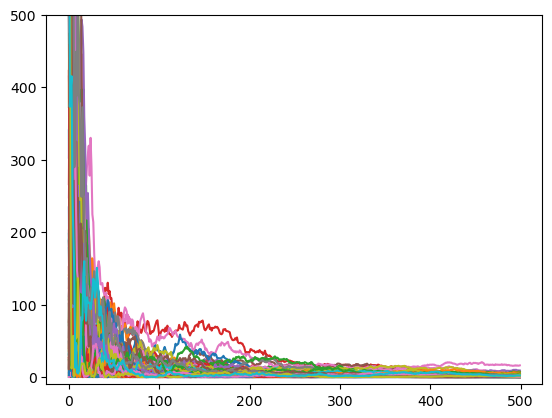

In [83]:
matplotlib.pyplot.plot(cumvs.T)
matplotlib.pyplot.ylim([-10,500]);